In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

N=4

init_random = np.random.random((N))
lattice_n = np.zeros((N))
lattice_n[init_random>=0.5]=1
lattice_n[init_random<=0.5]=-1

lattice_p = np.zeros((N))
lattice_p[init_random>=0.5]=-1
lattice_p[init_random<=0.5]=1
#arr = lattice_p

def get_energy(lattice):
    kern=generate_binary_structure(1,1)
    kern[1] = False
    arr = -lattice * convolve(lattice, kern, mode='wrap')
    return arr.sum()



In [3]:
lattice_n


array([ 1.,  1., -1., -1.])

latt1

In [4]:
latt1

NameError: name 'latt1' is not defined

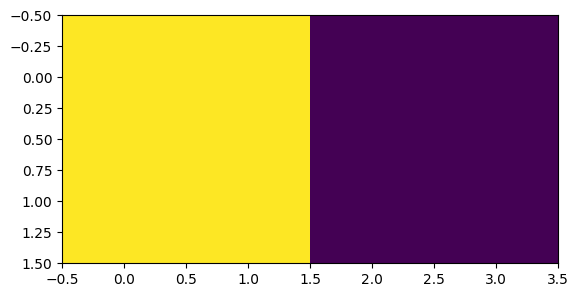

In [5]:
latt2= (lattice_n,lattice_n)
plt.imshow(latt2)

In [85]:
arr

array([ 1., -1.,  1., -1.])

In [14]:
@njit
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in range(0, times-1):
        x = np.random.randint(N)
        #y = np.random.randint(0,N)
        spin_i = spin_arr[x]
        spin_f = spin_i*-1

    
        E_i = 0
        E_f = 0
        if x>0:
            E_i += -spin_i*spin_arr[x-1]
            E_f += -spin_f*spin_arr[x-1]

        if x<N-1:
            E_i += -spin_i*spin_arr[x+1]
            E_f += -spin_f*spin_arr[x+1]

       
            
        dE=E_f-E_i
        if (dE>0)*(np.random.random()<np.exp(-BJ*dE)):
            spin_arr[x]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x] = spin_f
            energy += dE
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
    return net_spins, net_energy

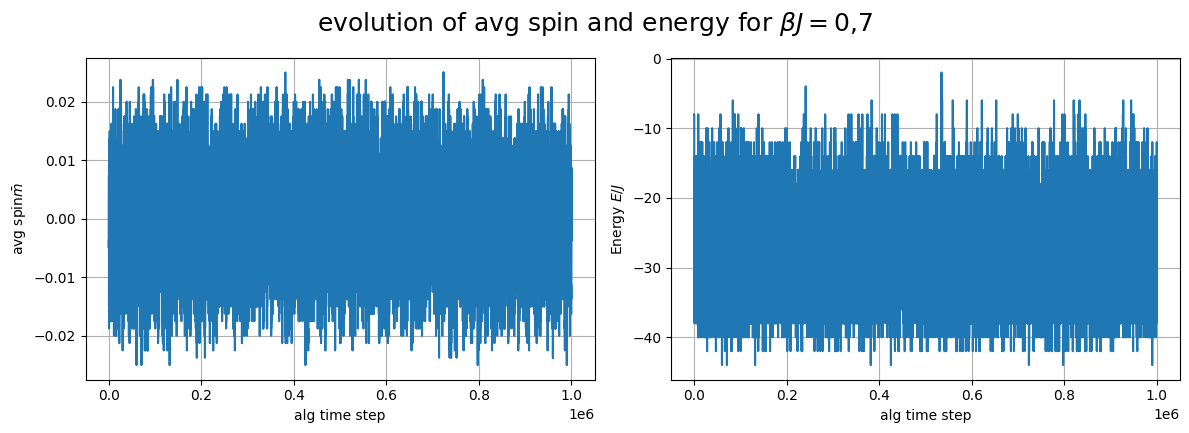

In [18]:
spins, energies = metropolis(lattice_p, 1000000, 0.7, get_energy(lattice_p))

fig, axes = plt.subplots(1, 2, figsize=(12, 4) )
ax = axes[0]
ax.plot(spins/N**2)
ax.set_xlabel('alg time step')
ax.set_ylabel(r'avg spin$\bar{m}$')
ax.grid()
ax=axes[1]
ax.plot(energies)
ax.set_xlabel('alg time step')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
fig.suptitle(r'evolution of avg spin and energy for $\beta J=$0,7', y=1.07, size = 18)
plt.show()